In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
michigan_df = pd.read_csv('../../data/applied_plotting_data_representation/michigan_wind_power.csv')
texas_df = pd.read_csv('../../data/applied_plotting_data_representation/texas_wind_power.csv')
united_states_df = pd.read_csv('../../data/applied_plotting_data_representation/united_states_wind_power.csv')

united_states_df = united_states_df.rename(columns={"Sep": "Sept"})

references = ['Michigan', 'Texas', 'United States']
list_years = ['2014', '2015', '2016']
list_months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]


michigan_df = michigan_df[michigan_df['Year'].isin(list_years)][['Year'] + list_months]
texas_df = texas_df[texas_df['Year'].isin(list_years)][['Year'] + list_months]
united_states_df = united_states_df[united_states_df['Year'].isin(list_years)][['Year'] + list_months]

def replace_comma(x):
    result = x
    if type(x) == str:
        result = int(x.replace(",", ""))
    return result

for month in list_months:
    michigan_df[month] = michigan_df[month].apply(replace_comma)
    texas_df[month] = texas_df[month].apply(replace_comma)
    united_states_df[month] = united_states_df[month].apply(replace_comma)

michigan_df = pd.pivot_table(michigan_df, values=list_months, columns=['Year'])
texas_df = pd.pivot_table(texas_df, values=list_months, columns=['Year'])
united_states_df = pd.pivot_table(united_states_df, values=list_months, columns=['Year'])

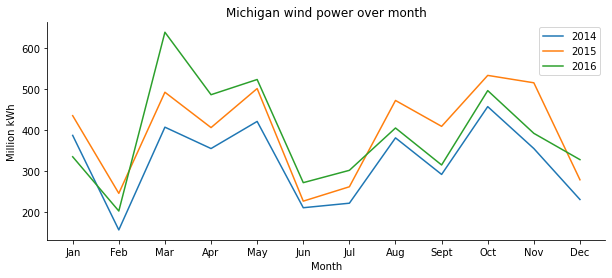

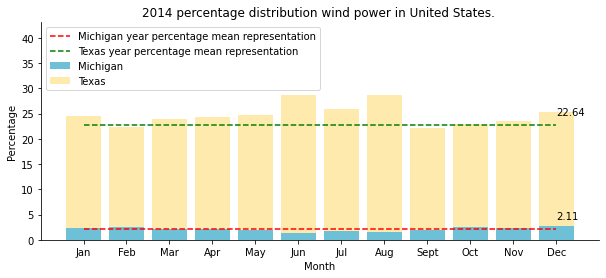

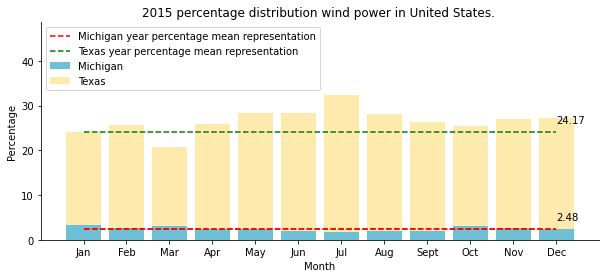

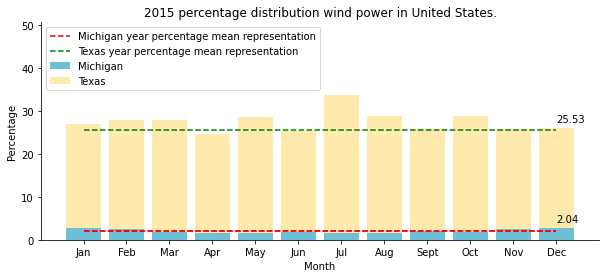

In [86]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(list_months, michigan_df)
ax.set_title("Michigan wind power over month")
ax.set_ylabel("Million kWh")
ax.set_xlabel('Month')
ax.legend(michigan_df.columns)
for side in ["top", "right"]:
    s_side = ax.spines[side]
    s_side.set_visible(False)



def calculate_state_representation(year, country, state):
    representation = []
    for month in list_months:
         representation.append((state[year][month] * 100) / country[year][month])
    return representation



## Figure 1
michigan_r = calculate_state_representation(2014, united_states_df, michigan_df)
texas_r = calculate_state_representation(2014, united_states_df, texas_df)
texas_mean = np.mean(np.array(texas_r))
michigan_mean = np.mean(np.array(michigan_r))
fig1, ax1 = plt.subplots(figsize=(10, 4))
ax1.bar(list_months, michigan_r, color='#6DC0D5', label="Michigan")
ax1.bar(list_months, texas_r, bottom=michigan_r, color='#FFEAAE', label="Texas")
ax1.set_title("2014 percentage distribution wind power in United States. ")
ax1.set_ylabel("Percentage")
ax1.set_xlabel("Month")
ax1.hlines(michigan_mean, list_months[0], list_months[-1], colors="r", linestyles="--",
           label="Michigan year percentage mean representation")
ax1.text(list_months[-1], michigan_mean + 2, "{:.2f}".format(michigan_mean))
ax1.hlines(texas_mean, list_months[0], list_months[-1], colors="g", linestyles="--",
           label="Texas year percentage mean representation")
ax1.text(list_months[-1], texas_mean + 2, "{:.2f}".format(texas_mean))
for side in ["top", "right"]:
    s_side = ax1.spines[side]
    s_side.set_visible(False)
ax1.margins(y = 0.5)
ax1.legend(loc="upper left")

## Figure 2
michigan_r = calculate_state_representation(2015, united_states_df, michigan_df)
texas_r = calculate_state_representation(2015, united_states_df, texas_df)
texas_mean = np.mean(np.array(texas_r))
michigan_mean = np.mean(np.array(michigan_r))
fig2, ax2 = plt.subplots(figsize=(10, 4))
ax2.bar(list_months, michigan_r, color='#6DC0D5', label="Michigan")
ax2.bar(list_months, texas_r, bottom=michigan_r, color='#FFEAAE', label="Texas")
ax2.set_title("2015 percentage distribution wind power in United States. ")
ax2.set_ylabel("Percentage")
ax2.set_xlabel("Month")
ax2.hlines(michigan_mean, list_months[0], list_months[-1], colors="r", linestyles="--",
           label="Michigan year percentage mean representation")
ax2.hlines(michigan_mean, list_months[0], list_months[-1], colors="r", linestyles="--")
ax2.text(list_months[-1], michigan_mean + 2, "{:.2f}".format(michigan_mean))
ax2.hlines(texas_mean, list_months[0], list_months[-1], colors="g", linestyles="--",
           label="Texas year percentage mean representation")
ax2.text(list_months[-1], texas_mean + 2, "{:.2f}".format(texas_mean))
for side in ["top", "right"]:
    s_side = ax2.spines[side]
    s_side.set_visible(False)

ax2.margins(y = 0.5)
ax2.legend(loc="upper left")

# Figure 3
michigan_r = calculate_state_representation(2016, united_states_df, michigan_df)
texas_r = calculate_state_representation(2016, united_states_df, texas_df)
texas_mean = np.mean(np.array(texas_r))
michigan_mean = np.mean(np.array(michigan_r))
fig3, ax3 = plt.subplots(figsize=(10, 4))
ax3.bar(list_months, michigan_r, color='#6DC0D5', label="Michigan")
ax3.bar(list_months, texas_r, bottom=michigan_r, color='#FFEAAE', label="Texas")
ax3.set_title("2015 percentage distribution wind power in United States.")
ax3.set_ylabel("Percentage")
ax3.set_xlabel("Month")
ax3.hlines(michigan_mean, list_months[0], list_months[-1], colors="r", linestyles="--",
           label="Michigan year percentage mean representation")
ax3.hlines(michigan_mean, list_months[0], list_months[-1], colors="r", linestyles="--")
ax3.text(list_months[-1], michigan_mean + 2, "{:.2f}".format(michigan_mean))
ax3.hlines(texas_mean, list_months[0], list_months[-1], colors="g", linestyles="--",
           label="Texas year percentage mean representation")
ax3.text(list_months[-1], texas_mean + 2, "{:.2f}".format(texas_mean))
for side in ["top", "right"]:
    s_side = ax3.spines[side]
    s_side.set_visible(False)

ax3.margins(y = 0.5)
ax3.legend(loc="upper left")